In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar

## Dataset

In [2]:
dataset = pd.read_csv("citibike.csv")

In [3]:
dataset.head()

tripduration          starttime           stoptime  start station id  \
0          3117  8/1/2015 01:19:15  8/1/2015 02:11:12               301   
1           690  8/1/2015 01:27:30  8/1/2015 01:39:00               301   
2           727  8/1/2015 01:38:49  8/1/2015 01:50:57               301   
3           698  8/1/2015 06:06:41  8/1/2015 06:18:20               301   
4           351  8/1/2015 06:24:29  8/1/2015 06:30:21               301   

  start station name  start station latitude  start station longitude  \
0  E 2 St & Avenue B               40.722174               -73.983688   
1  E 2 St & Avenue B               40.722174               -73.983688   
2  E 2 St & Avenue B               40.722174               -73.983688   
3  E 2 St & Avenue B               40.722174               -73.983688   
4  E 2 St & Avenue B               40.722174               -73.983688   

   end station id          end station name  end station latitude  \
0             301         E 2 St & Avenue B             40.722174   
1             349   Rivington St & Ridge St             40.718502   
2            2010      Grand St & Greene St             40.721655   
3             527           E 33 St & 2 Ave             40.744023   
4             250  Lafayette St & Jersey St             40.724561   

   end station longitude  bikeid    usertype  birth year  gender  
0             -73.983688   18070  Subscriber      1986.0       1  
1             -73.983299   19699  Subscriber      1985.0       1  
2             -74.002347   20953  Subscriber      1982.0       1  
3             -73.976056   23566  Subscriber      1976.0       1  
4             -73.995653   17545  Subscriber      1959.0       1

In [4]:
dataset.shape

(4212, 15)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 15 columns):
tripduration               4212 non-null int64
starttime                  4212 non-null object
stoptime                   4212 non-null object
start station id           4212 non-null int64
start station name         4212 non-null object
start station latitude     4212 non-null float64
start station longitude    4212 non-null float64
end station id             4212 non-null int64
end station name           4212 non-null object
end station latitude       4212 non-null float64
end station longitude      4212 non-null float64
bikeid                     4212 non-null int64
usertype                   4212 non-null object
birth year                 3682 non-null float64
gender                     4212 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 493.7+ KB


In [6]:
orig_x = dataset.iloc[:,5].values
orig_y = dataset.iloc[:,6].values
lat = dataset.iloc[:,9].values
long = dataset.iloc[:,10].values
min_lat = min(lat)
max_lat = max(lat)
min_long = min(long)
max_long = max(long)

In [7]:
orig_x,orig_y

(array([40.72217444, 40.72217444, 40.72217444, ..., 40.72217444,
        40.72217444, 40.72217444]),
 array([-73.98368779, -73.98368779, -73.98368779, ..., -73.98368779,
        -73.98368779, -73.98368779]))

[]

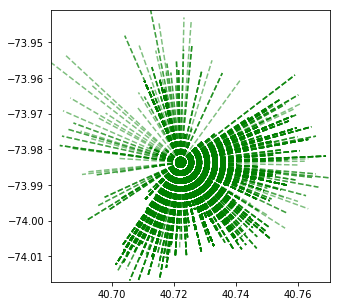

In [8]:
plt.figure(figsize=(5,5))
plt.plot([orig_x,lat],[orig_y,long],'--', c = 'g',alpha = 0.5)
plt.xlim(min_lat,max_lat)
plt.ylim(min_long,max_long)
plt.plot()

In [9]:
min_lat,min_long

(40.680342423, -74.01713445)

In [10]:
max_lat,max_long

(40.770513, -73.94100005)

In [11]:
MAP = plt.imread("map.png")

In [12]:
MAP.shape

(836, 534, 4)

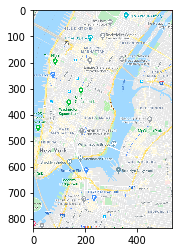

In [13]:
plt.imshow(MAP)

[]

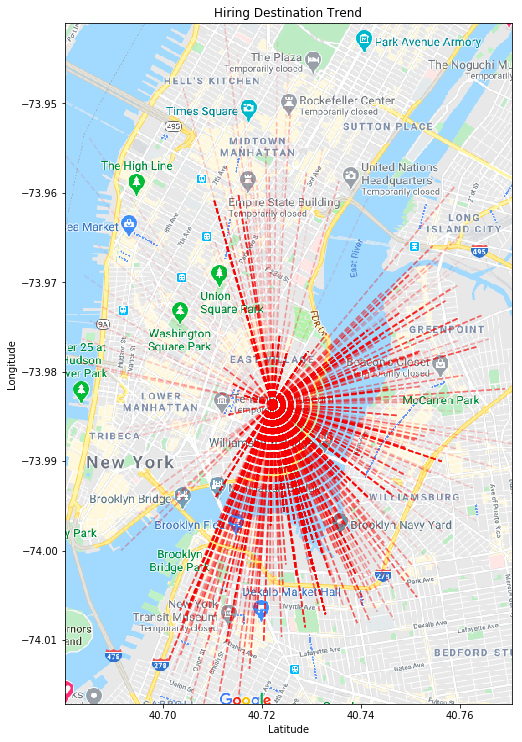

In [14]:
asp_ratio = MAP.shape[0]/MAP.shape[1]
size = 8
plt.figure(figsize=(size,asp_ratio*size))
plt.title("Hiring Destination Trend")
plt.plot([orig_x,lat],[orig_y,long],'--', c = 'r',alpha = 0.1)
plt.imshow(MAP,extent=[min_lat,max_lat,min_long,max_long], aspect="auto")
plt.xlim(min_lat,max_lat)
plt.ylim(min_long,max_long)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.plot()

In [15]:
timestamps = dataset['starttime'].values

In [16]:
rows=[]
for timestamp in timestamps:
    row=[]
    #print(timestamp)
    seq=str()
    for ch in timestamp:
        #print(ch)
        if ch != '/' and ch != ' ' and ch != ':':
            #print(ch)
            seq=seq+ch
            
        else:
            seq = int(seq)
            row.append(seq)
            seq=str()
    seq = int(seq)
    row.append(seq)
    seq=str()
    day=calendar.weekday(row[2],row[0],row[1])
    row.append(day)
    
    rows.append(row)
rows=np.array(rows)

In [17]:
rows.shape

(4212, 7)

In [18]:
data = pd.DataFrame(rows, columns=['MM','DD','YYYY','HH','mm','SS','Day'])

In [19]:
data.head()

MM  DD  YYYY  HH  mm  SS  Day
0   8   1  2015   1  19  15    5
1   8   1  2015   1  27  30    5
2   8   1  2015   1  38  49    5
3   8   1  2015   6   6  41    5
4   8   1  2015   6  24  29    5

In [20]:
date_dict={}
for row in rows:
    d = row[1]
    hr = row [3]
    
    if hr>=0 and hr<3:
        hr = 0
        
    elif hr>=3 and hr<6:
        hr = 3
        
    elif hr>=6 and hr<9:
        hr = 6
        
    elif hr>=9 and hr<12:
        hr = 9
        
    elif hr>=12 and hr<15:
        hr = 12
    
    elif hr>=15 and hr<18:
        hr = 15
    
    elif hr>=18 and hr<21:
        hr = 18
        
    elif hr>=21 and hr<24:
        hr = 21
        
    
        
    
    
    if d not in date_dict:
        date_dict[d] = [hr]
    else:
        date_dict[d].append(hr)

In [21]:
rows_1=[]
for date in date_dict:
    hrs={
        0:0,
        3:0,
        6:0,
        9:0,
        12:0,
        15:0,
        18:0,
        21:0
    }
    for hr in date_dict[date]:
        hrs[hr]=hrs[hr]+1
        
    day=calendar.weekday(2015,8,date)
    
    for hr in hrs:
        row = [date,hr,day,hrs[hr]]
        rows_1.append(row)

rows_1 = np.array(rows_1)

In [22]:
transformed_data = pd.DataFrame(rows_1, columns=['DD','HH','Day','Rentals'])

In [23]:
transformed_data.head()

DD  HH  Day  Rentals
0   1   0    5        3
1   1   3    5        0
2   1   6    5        9
3   1   9    5       41
4   1  12    5       39

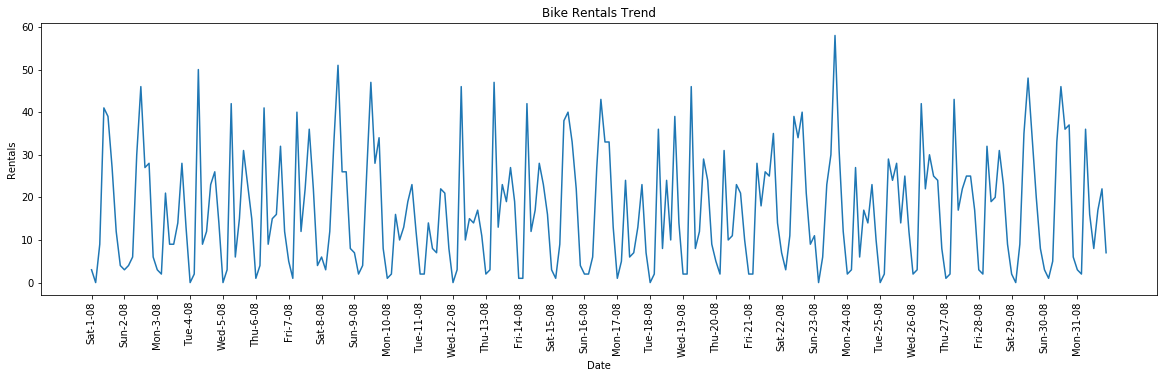

In [24]:
ticks=[calendar.day_name[calendar.weekday(2015,8,i)][:3]+'-'+str(i)+'-08' for i in range(1,32)]
plt.figure(figsize=(20,5))
plt.title("Bike Rentals Trend")
plt.plot(transformed_data['Rentals'].values)
plt.xticks(range(0,248,8), ticks, rotation =90)
plt.xlabel("Date")
plt.ylabel("Rentals")
plt.show()

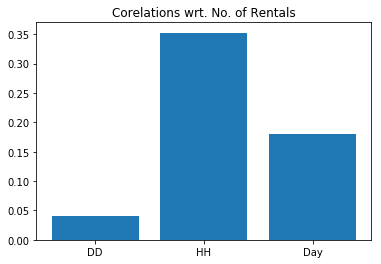

In [25]:
plt.figure()
plt.title("Corelations wrt. No. of Rentals")
plt.bar(transformed_data.corr().iloc[-1,:-1].keys(),transformed_data.corr().iloc[-1,:-1].values)
plt.show()

In [26]:
transformed_data['Day']=transformed_data['Day'].astype(str)
transformed_data['HH']=transformed_data['HH'].astype(str)

In [27]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
DD         248 non-null int64
HH         248 non-null object
Day        248 non-null object
Rentals    248 non-null int64
dtypes: int64(2), object(2)
memory usage: 7.8+ KB


In [28]:
data_dummies = pd.get_dummies(transformed_data)

In [29]:
data_dummies.head()

DD  Rentals  HH_0  HH_12  HH_15  HH_18  HH_21  HH_3  HH_6  HH_9  Day_0  \
0   1        3     1      0      0      0      0     0     0     0      0   
1   1        0     0      0      0      0      0     1     0     0      0   
2   1        9     0      0      0      0      0     0     1     0      0   
3   1       41     0      0      0      0      0     0     0     1      0   
4   1       39     0      1      0      0      0     0     0     0      0   

   Day_1  Day_2  Day_3  Day_4  Day_5  Day_6  
0      0      0      0      0      1      0  
1      0      0      0      0      1      0  
2      0      0      0      0      1      0  
3      0      0      0      0      1      0  
4      0      0      0      0      1      0

In [30]:
train_data = data_dummies.iloc[:185]
test_data = data_dummies.iloc[185:]

In [31]:
X_train = train_data.drop(columns=['Rentals']).values
y_train = train_data['Rentals'].values
X_test = test_data.drop(columns=['Rentals']).values
y_test = test_data['Rentals'].values

In [32]:
X_train.shape

(185, 16)

In [33]:
X_train

array([[ 1,  1,  0, ...,  0,  1,  0],
       [ 1,  0,  0, ...,  0,  1,  0],
       [ 1,  0,  0, ...,  0,  1,  0],
       ...,
       [23,  0,  0, ...,  0,  0,  1],
       [23,  0,  0, ...,  0,  0,  1],
       [24,  1,  0, ...,  0,  0,  0]])

In [43]:
def modelPerformance(model, X_train,X_test, y_train, y_test):
    print("====================================================================================")
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    train_rms = np.sqrt(np.sum(np.square(train_predictions - y_train)) / y_train.shape[0])
    test_rms = np.sqrt(np.sum(np.square(test_predictions - y_test)) / y_test.shape[0])
    
    train_mae = np.sum(np.sqrt(np.square(y_train - train_predictions))) / y_train.shape[0]
    test_mae = np.sum(np.sqrt(np.square(y_test - test_predictions))) / y_test.shape[0]
    
    ticks=[calendar.day_name[calendar.weekday(2015,8,i)][:3]+'-'+str(i)+'-08' for i in range(1,32)]
    
    
    perf_matrix = [
        ["Train", str(train_score), str(train_rms), str(train_mae)],
        ["Test", str(test_score), str(test_rms), str(test_mae)]
    ]
    print("Model: ",model,"\n\nPerformance and Predictions Trend: ")
    print(perf_matrix)
    plt.figure(figsize=(20,5))
    plt.plot(range(0,185),y_train, label = "Train Values")
    plt.plot(range(185,248),y_test, label = "Test Values")


    plt.plot(range(0,185),train_predictions, '--', label = "Predicted Train Values")
    plt.plot(range(185,248),test_predictions, '--', label = "Predicted Test Values")

    plt.xticks(range(0,248,8), ticks, rotation =90)
    plt.xlabel("Date")
    plt.ylabel("Rentals")
    
    plt.table(cellText=perf_matrix,
        cellLoc="center", colWidths=None,
        rowLabels=None, rowColours=None, rowLoc="center",
        colLabels=["Data","R^2 Score","RMS Score","MAE Score"], colColours="yyyy", colLoc="center",
        loc='top', bbox=None)
    plt.legend()
    plt.box(True)
    plt.show()
    
    
    return model

In [44]:
from sklearn.ensemble import RandomForestRegressor

Model:  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.9554217833531748', '2.8737059602447057', '2.052'], ['Test', '0.7157135287528549', '7.0169029481764245', '5.344126984126985']]


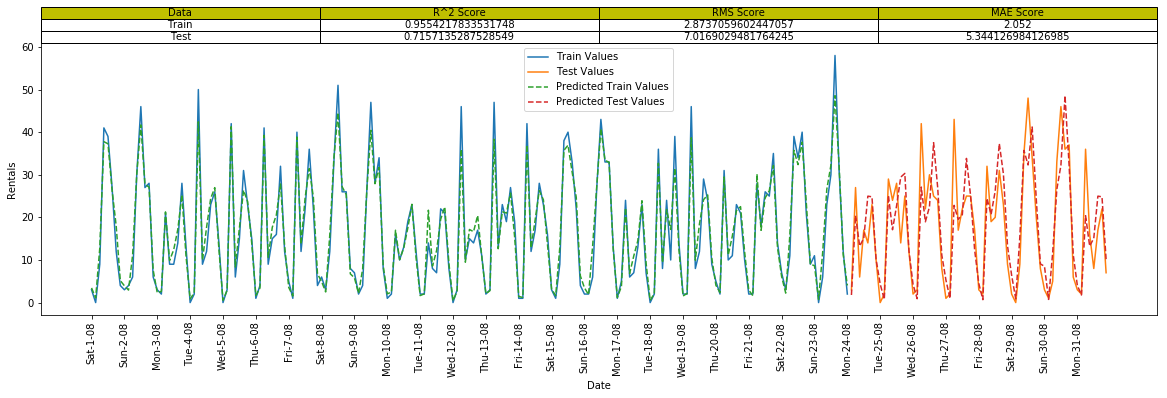

Model:  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.9566069852131687', '2.8352469743225908', '2.022864864864865'], ['Test', '0.7314989508444742', '6.819308953491886', '5.198412698412699']]


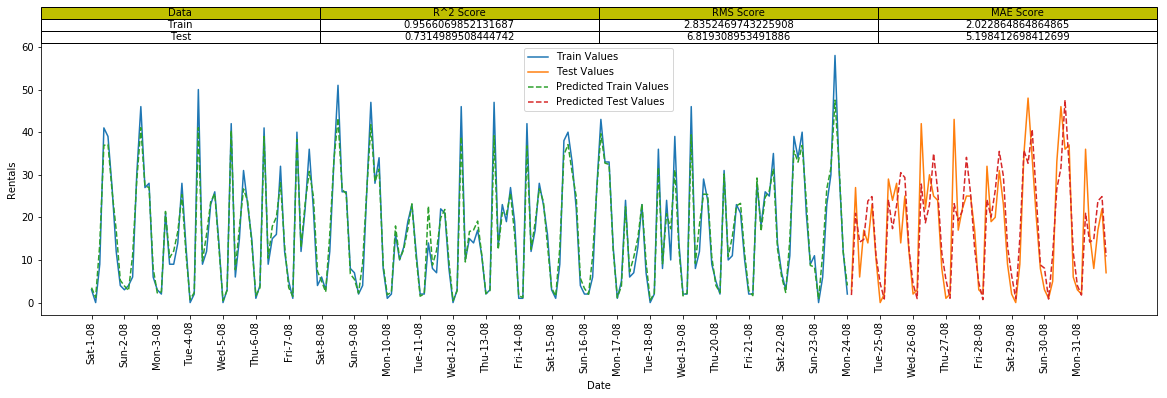

Model:  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.9558145091444545', '2.861019549892112', '2.054054054054054'], ['Test', '0.7400043781091343', '6.710430625124082', '5.173365079365079']]


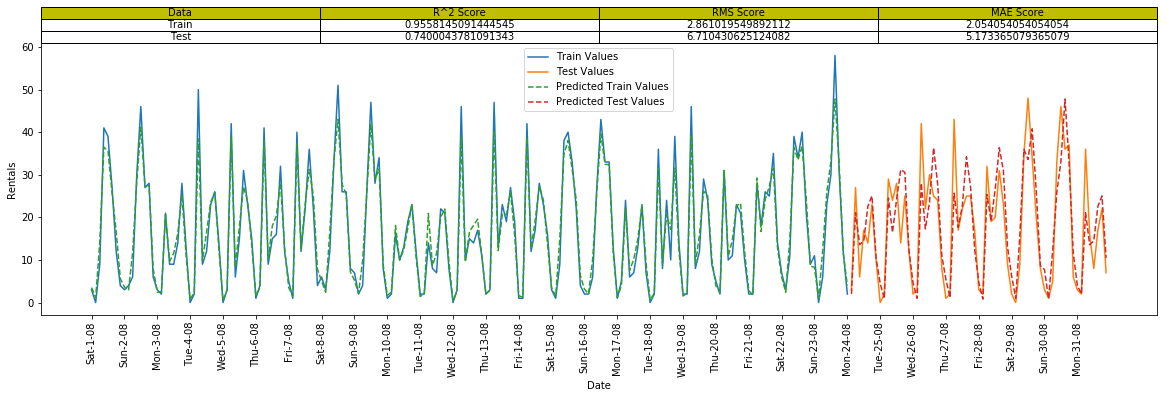

In [46]:
for n in [50,100,500]:
    rfr = RandomForestRegressor(n_estimators=n, random_state = 42)
    _ = modelPerformance(rfr, X_train, X_test, y_train, y_test)
    del _
    del rfr

Model:  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.37761104399305767', '10.737716225565077', '8.10717520261916'], ['Test', '0.44681754643624955', '9.788171532063997', '7.242577280902742']]


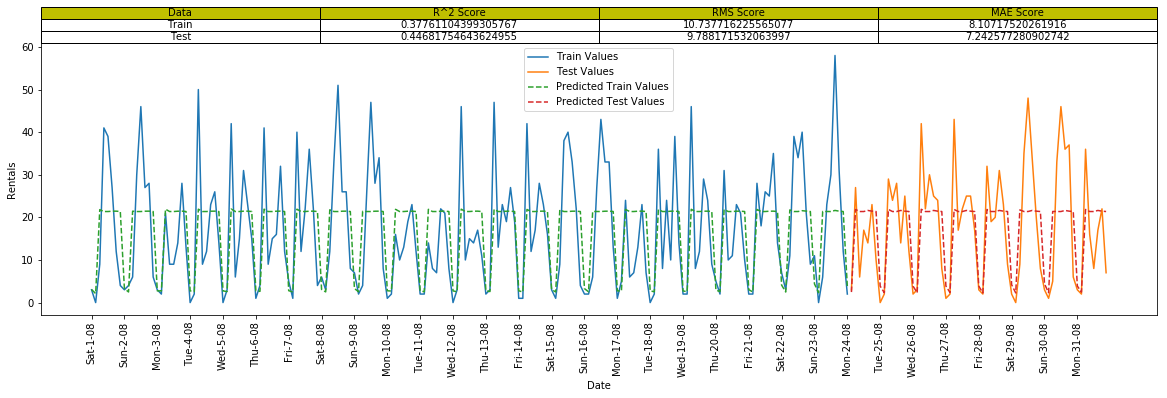

Model:  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.5378813590192439', '9.25247088601131', '6.496384386165127'], ['Test', '0.6410006931562633', '7.885226602214253', '5.547002154853537']]


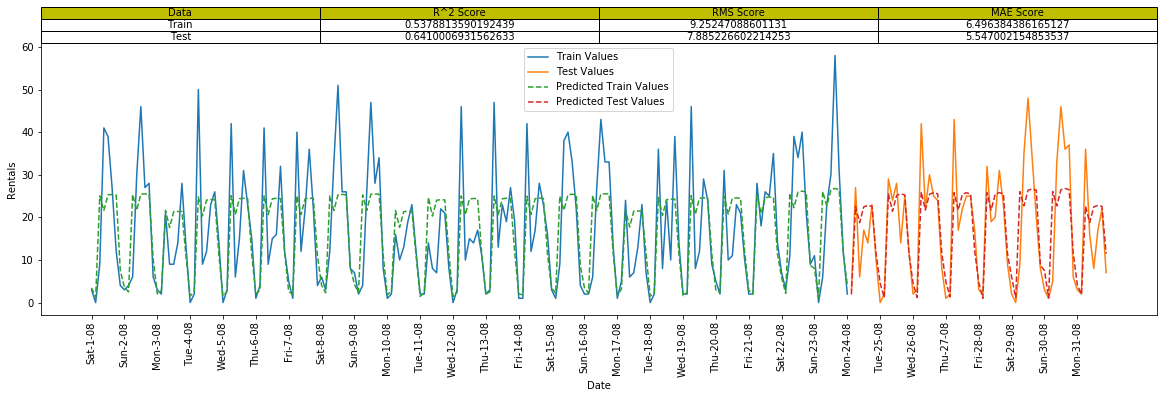

Model:  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.814150087893811', '5.867622476201796', '3.88263681015912'], ['Test', '0.7516878461844411', '6.557923736405854', '4.900916815783967']]


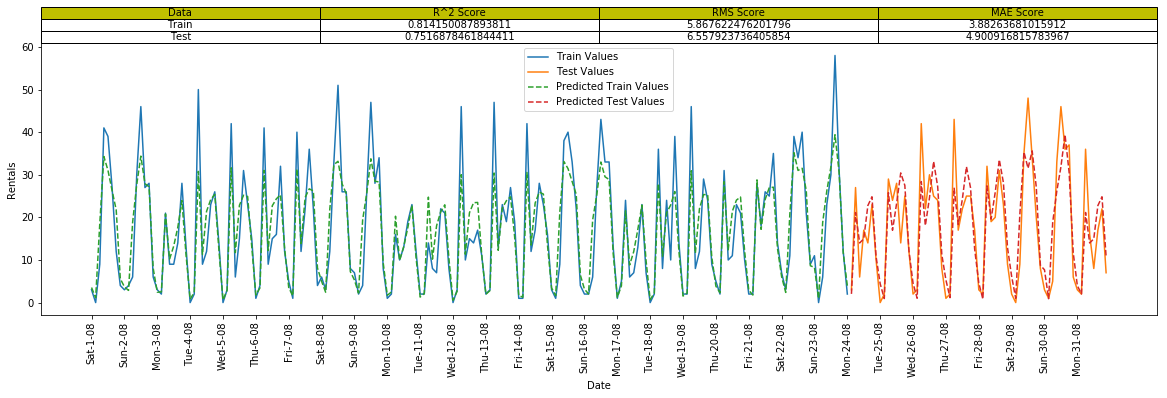

Model:  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.955268763027065', '2.8786339131861864', '2.065040566280566'], ['Test', '0.7378683313183523', '6.737939691372153', '5.169747089947087']]


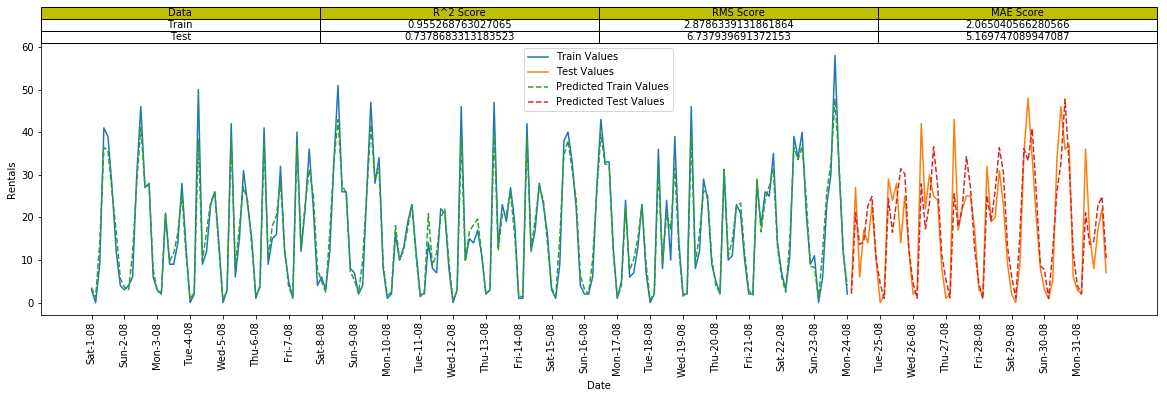

In [47]:
for n in [2,4,8,16]:
    rfr = RandomForestRegressor(n_estimators=500, max_depth=n, random_state = 42)
    _ = modelPerformance(rfr, X_train, X_test, y_train, y_test)
    del _
    del rfr

Model:  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=16, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.9575451256767098', '2.804431026747455', '2.022572972972973'], ['Test', '0.7239850558356731', '6.914068400100612', '5.278603174603175']]


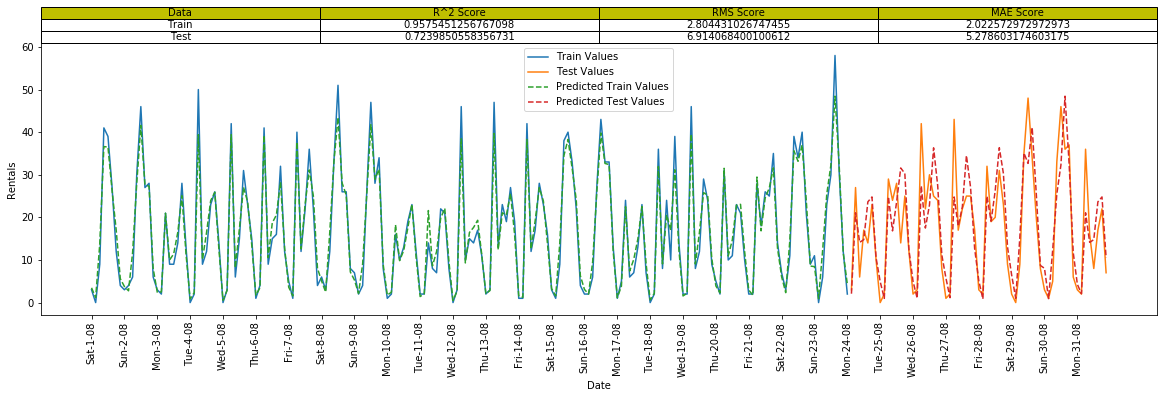

Model:  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=16, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.9575451256767098', '2.804431026747455', '2.022572972972973'], ['Test', '0.7239850558356731', '6.914068400100612', '5.278603174603175']]


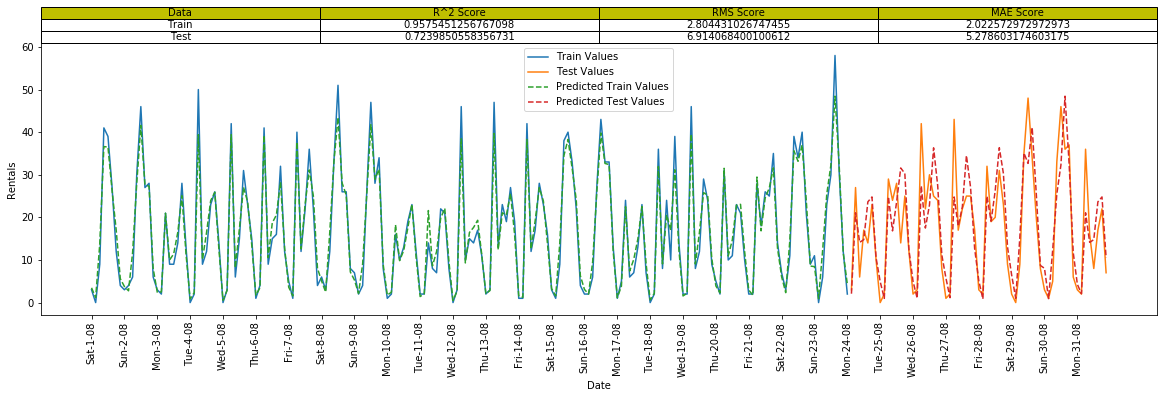

Model:  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=16, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.9575451256767098', '2.804431026747455', '2.022572972972973'], ['Test', '0.7239850558356731', '6.914068400100612', '5.278603174603175']]


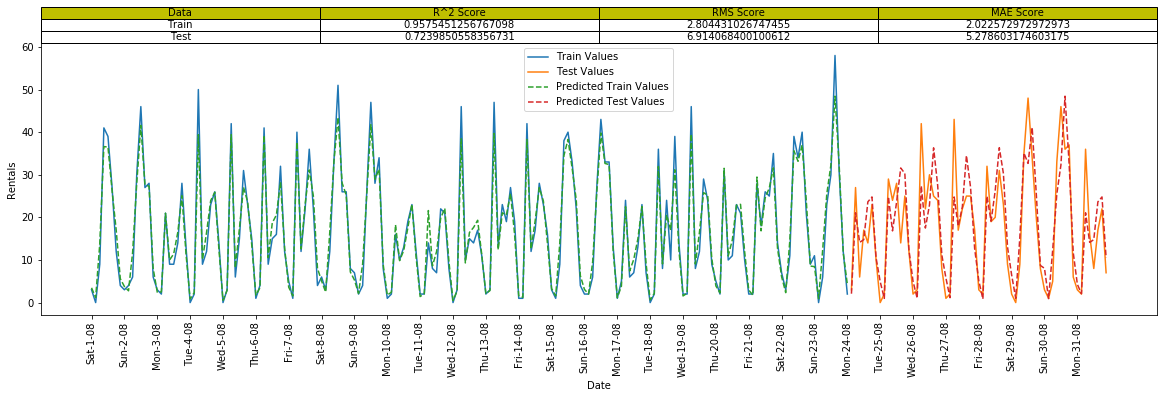

In [48]:
for n in [50,100,500]:
    rfr = RandomForestRegressor(n_estimators=250, max_features=16, random_state = 42)
    _ = modelPerformance(rfr, X_train, X_test, y_train, y_test)
    del _
    del rfr

In [49]:
from sklearn.linear_model import LinearRegression

Model:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

Performance and Predictions Trend: 
[['Train', '0.538472219377718', '9.246553934838408', '6.717126996233472'], ['Test', '0.6236206655964682', '8.07384222409596', '5.901690738262245']]


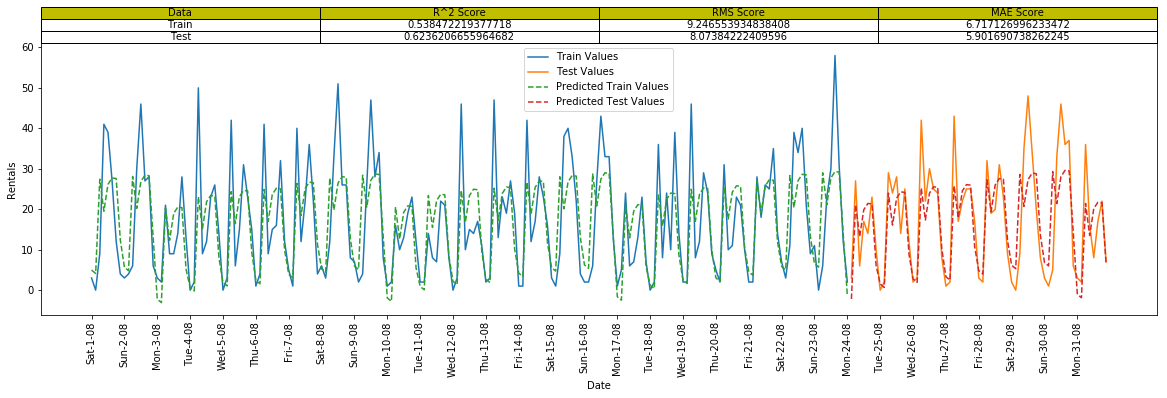

In [50]:
lr = LinearRegression()
_ = modelPerformance(lr, X_train, X_test, y_train, y_test)
del _
del lr

In [51]:
from sklearn.svm import SVR

Model:  SVR(C=100, cache_size=200, coef0=0.0, degree=10, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

Performance and Predictions Trend: 
[['Train', '0.353913457220405', '10.940226944611899', '6.883169390492013'], ['Test', '0.3205560819843787', '10.847862734035552', '8.704690112286167']]


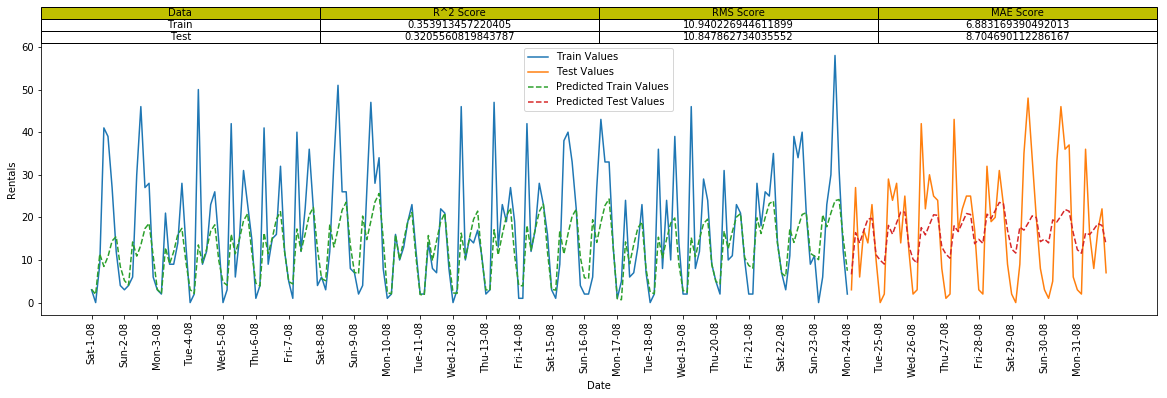

In [52]:
svr = SVR(C=100, degree=10)
_ = modelPerformance(svr, X_train, X_test, y_train, y_test)
del _
del svr

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

Model:  GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

Performance and Predictions Trend: 
[['Train', '0.8755821687116314', '4.800895987036945', '3.7084829160142543'], ['Test', '0.5303216594820257', '9.019192157530922', '6.622863325018877']]


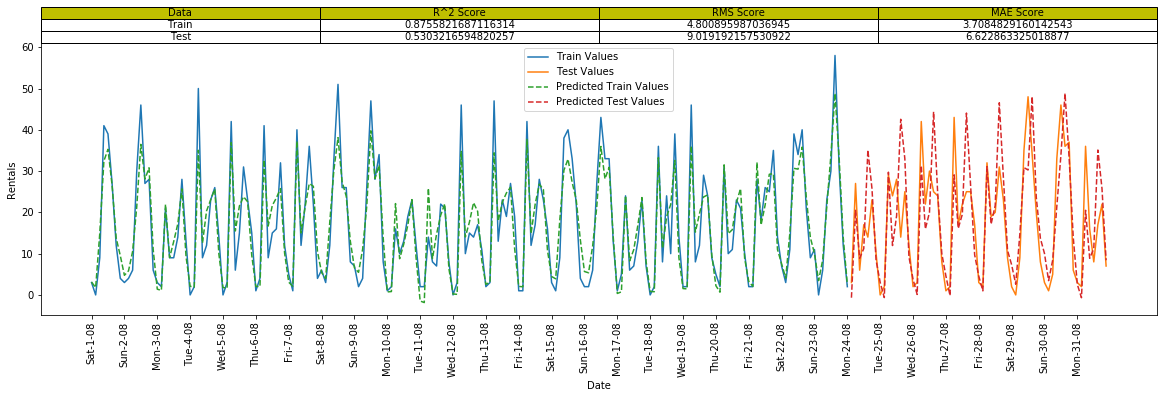

In [54]:
gbr = GradientBoostingRegressor(n_estimators=100)
_ = modelPerformance(gbr, X_train, X_test, y_train, y_test)
del _
del gbr

In [55]:
X_train

array([[ 1,  1,  0, ...,  0,  1,  0],
       [ 1,  0,  0, ...,  0,  1,  0],
       [ 1,  0,  0, ...,  0,  1,  0],
       ...,
       [23,  0,  0, ...,  0,  0,  1],
       [23,  0,  0, ...,  0,  0,  1],
       [24,  1,  0, ...,  0,  0,  0]])

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()

In [58]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

Performance and Predictions Trend: 
[['Train', '0.5302570700591823', '9.3284848299696', '6.879391891891892'], ['Test', '0.6043916146750121', '8.277517689932342', '6.080357142857143']]


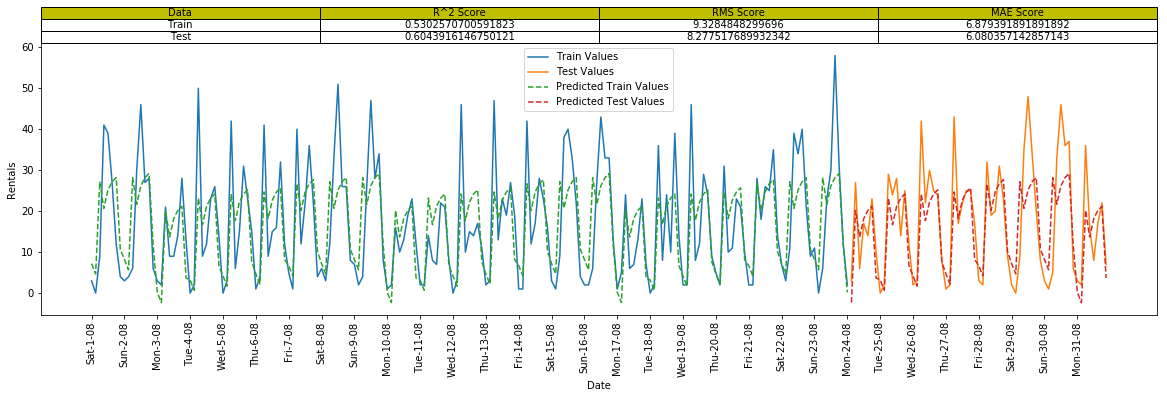

In [80]:
lr = LinearRegression()
_ = modelPerformance(lr, X_train_scaled[:,1:], X_test_scaled[:,1:], y_train, y_test)
del _
del lr

In [60]:
from sklearn.neighbors import KNeighborsRegressor

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform') 

Performance and Predictions Trend: 
[['Train', '1.0', '0.0', '0.0'], ['Test', '0.6874790881715425', '7.357104330304425', '5.2063492063492065']]


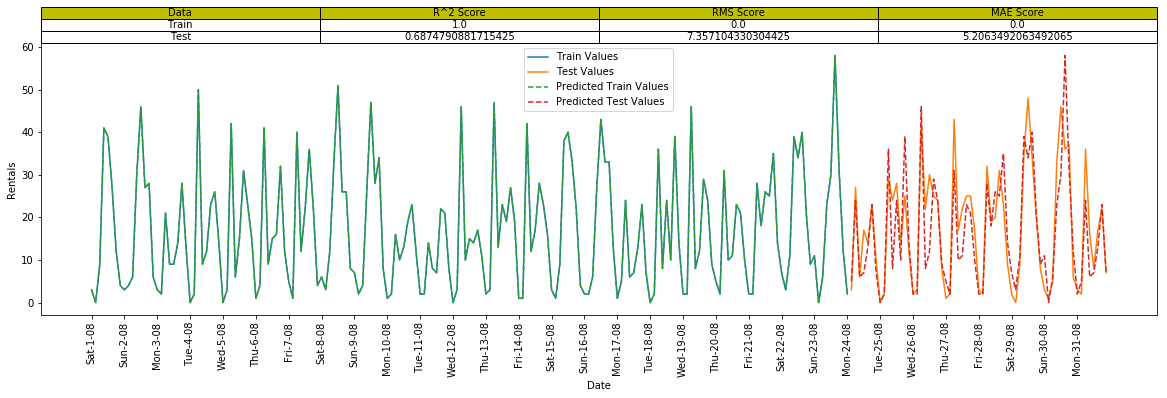

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.9196928552817277', '3.8570749314768347', '2.6243243243243244'], ['Test', '0.8079508590215446', '5.767313478726881', '4.111111111111111']]


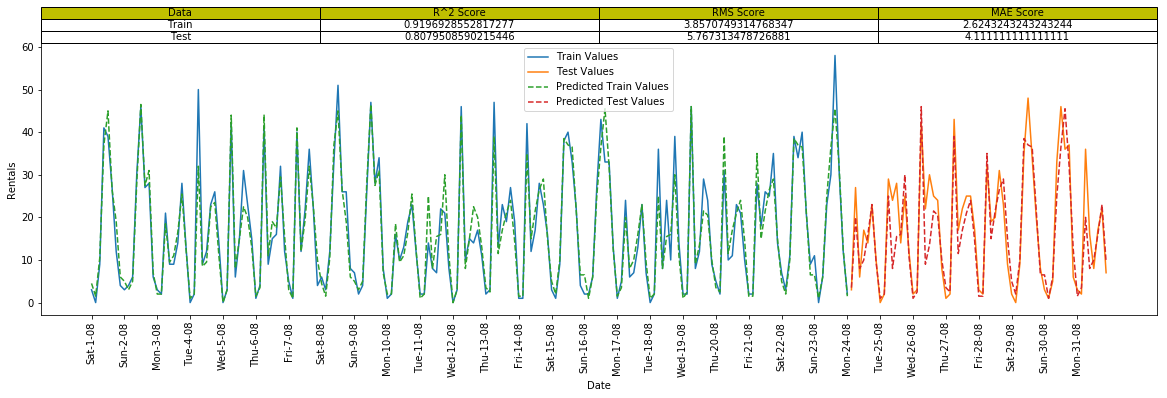

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.9040117223817326', '4.216868741374574', '2.920720720720721'], ['Test', '0.8303690664959777', '5.420257255197584', '3.788359788359788']]


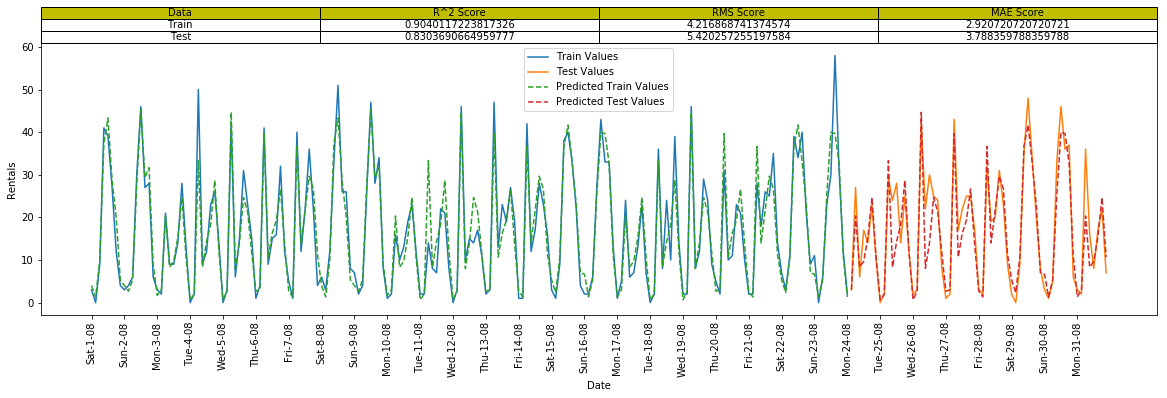

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.7967337099123755', '6.136400036292077', '4.532432432432432'], ['Test', '0.8078763947280372', '5.768431466811545', '4.067460317460317']]


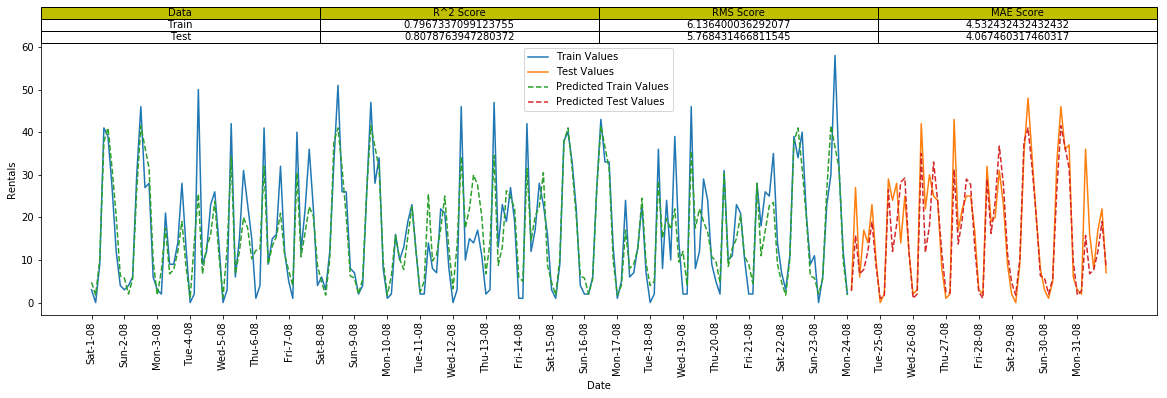

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.7173340235284617', '7.236319805282539', '5.482162162162163'], ['Test', '0.7761323809662356', '6.2267727124649745', '4.326984126984127']]


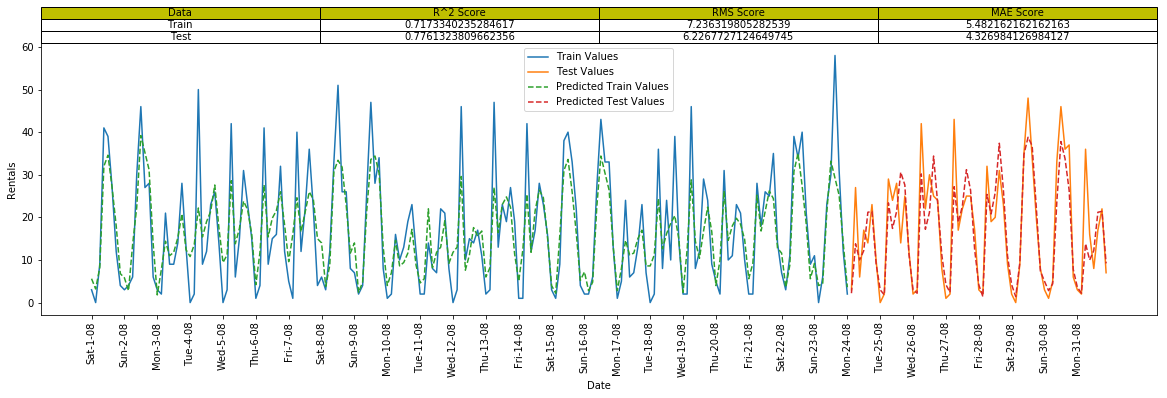

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.6169303564655252', '8.42402898049765', '6.558558558558559'], ['Test', '0.7113942188795623', '7.070007695776728', '5.116402116402116']]


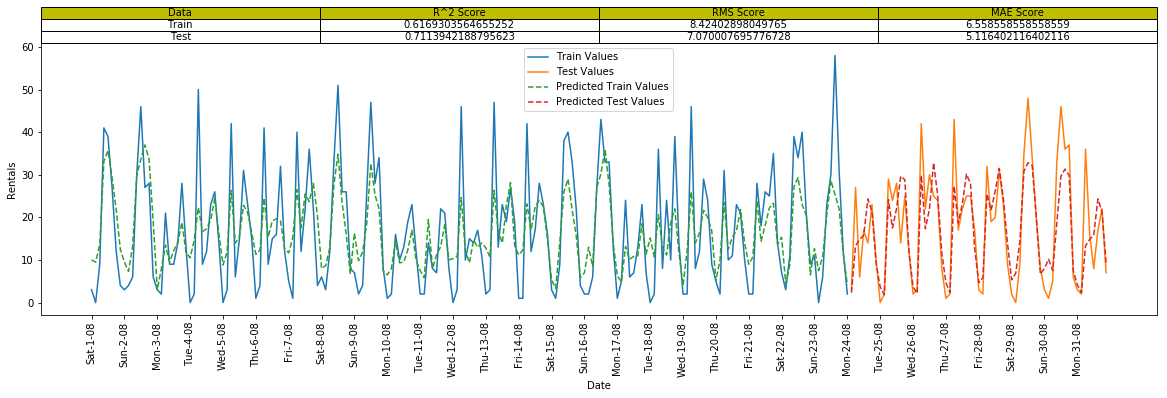

In [82]:
for n in [1,2,3,4,5,6]:
    knr = KNeighborsRegressor(n_neighbors=n)
    _ = modelPerformance(knr, X_train_scaled, X_test_scaled, y_train, y_test)
    del _
    del knr

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.8045317240556976', '6.017541924308531', '3.389189189189189'], ['Test', '0.7112160137327068', '7.072190114517074', '5.031746031746032']]


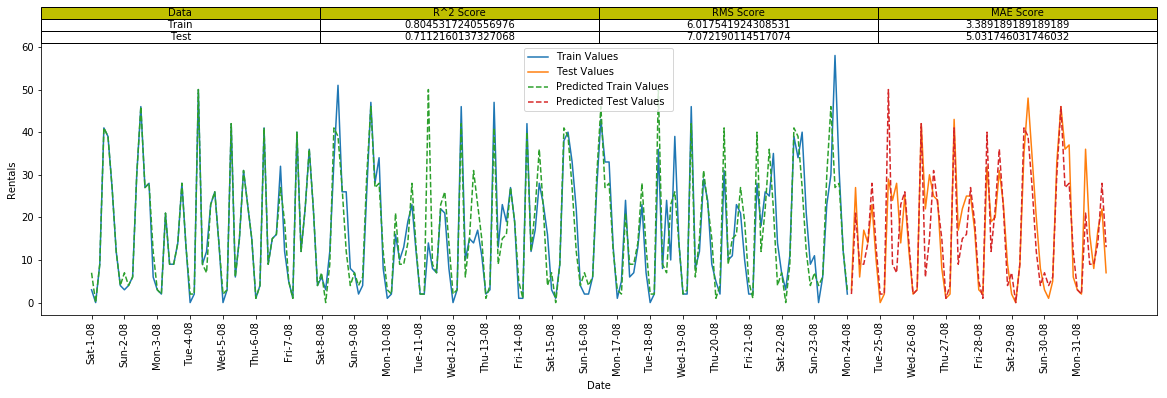

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.8571774378745523', '5.143744560931084', '3.2243243243243245'], ['Test', '0.8000461878645933', '5.884806911101874', '3.9761904761904763']]


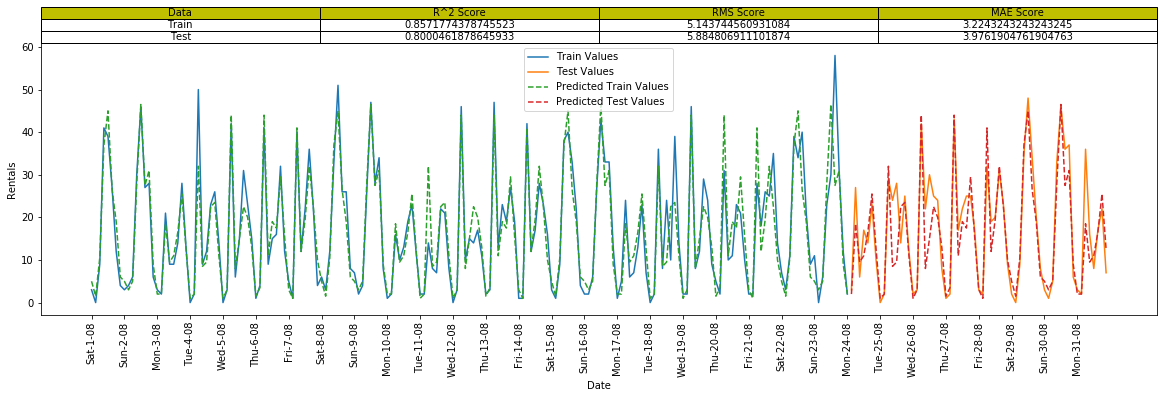

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.8816154302282895', '4.683047184358806', '3.07927927927928'], ['Test', '0.8336174917443737', '5.368107532757253', '3.719576719576719']]


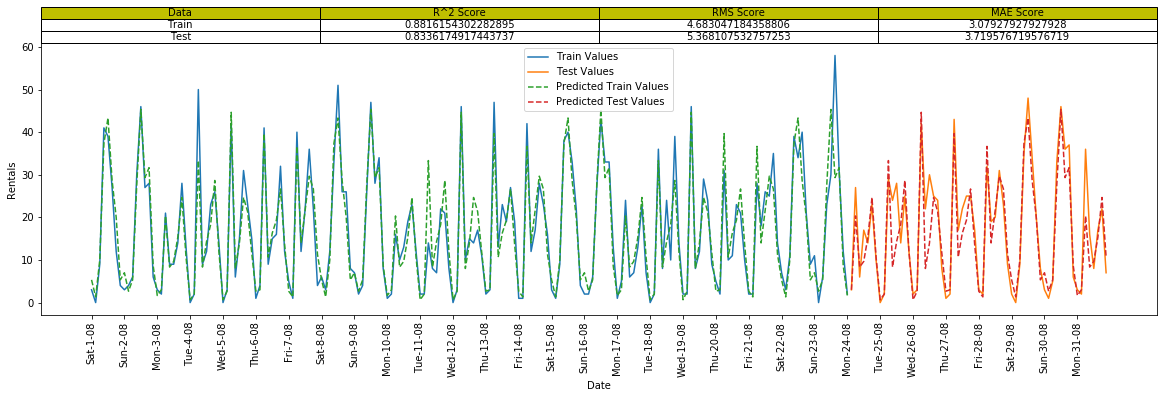

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.8721297105502066', '4.867049997244293', '3.460810810810811'], ['Test', '0.8016042100056735', '5.861835131689658', '3.865079365079365']]


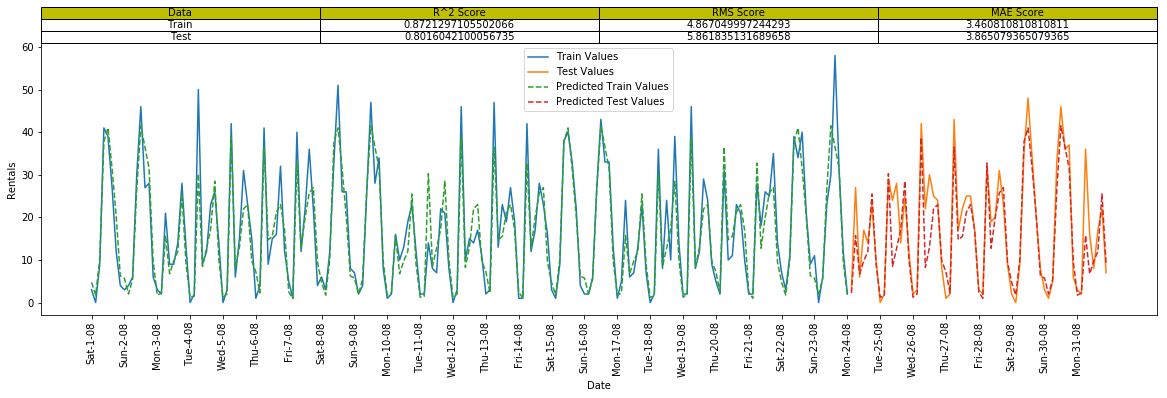

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.7812109202244206', '6.366398277442829', '4.687567567567567'], ['Test', '0.7617325904482042', '6.4239136565388755', '4.75873015873016']]


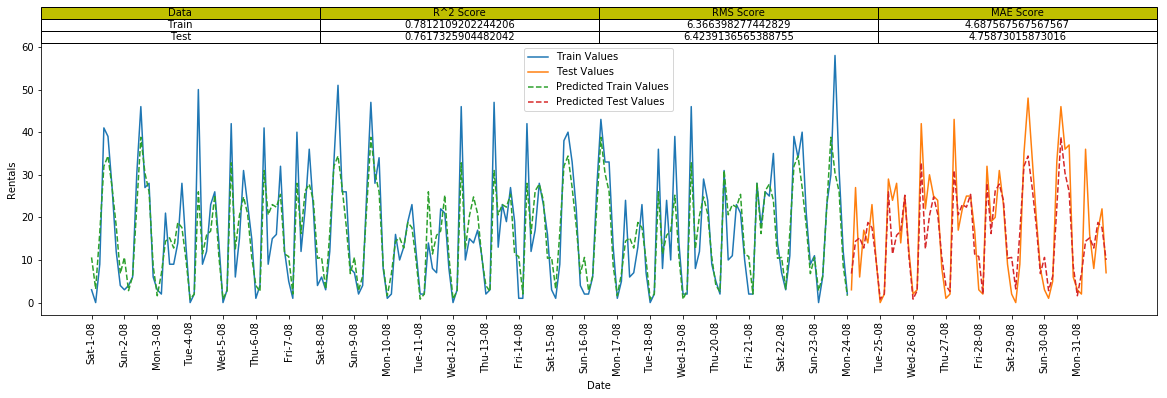

Model:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform') 

Performance and Predictions Trend: 
[['Train', '0.6727046779751836', '7.786654094152507', '6.058558558558559'], ['Test', '0.673927859647081', '7.514917557142764', '5.775132275132275']]


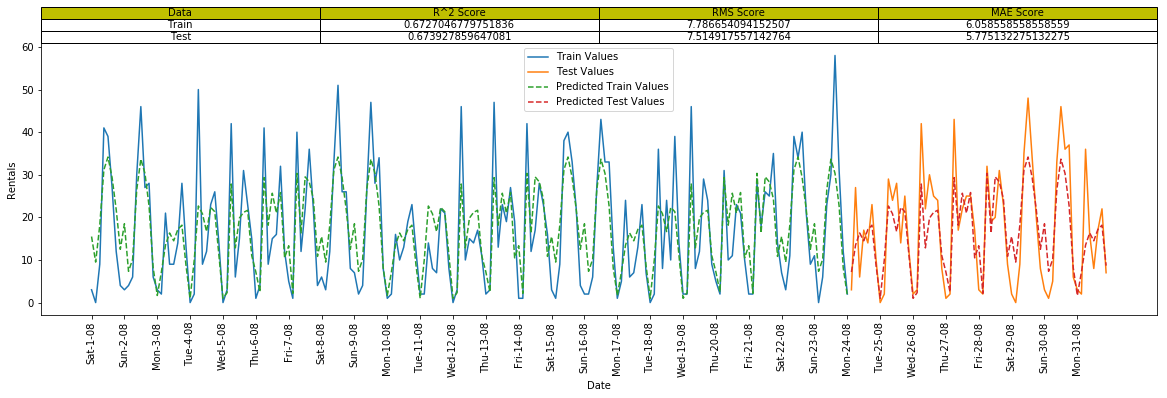

In [83]:
for n in [1,2,3,4,5,6]:
    knr = KNeighborsRegressor(n_neighbors=n)
    _ = modelPerformance(knr, X_train_scaled[:,1:], X_test_scaled[:,1:], y_train, y_test)
    del _
    del knr

In [86]:
transformed_data.to_csv("transformed_data.csv", index=False)